# Transactions Data Preparation
---
---

### Import Libraries
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os.path

In [77]:
import warnings
warnings.filterwarnings('ignore')

### Import Data
---

In [53]:
df = pd.read_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Clustering-/Datasets/twm_transactions.csv', delimiter=';')

In [54]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


### Explore Data
---

In [9]:
#TODO:
# 1 check for nulls
# 2 check for duplicates

In [21]:
# check for nulls and show the sum of nulls in each column
df.isnull().sum()

tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [22]:
# check for duplicates
df.duplicated().sum()

0

In [23]:
# check unique values in channel column and count them
df['channel'].unique()

array(['A ', 'V ', 'P ', '  ', 'B ', 'E ', 'K ', 'M ', 'C ', 'H ', 'T '],
      dtype=object)

In [18]:
# check unique values in tran_code column and count them
df['tran_code'].unique()

array(['IQ  ', 'WD  ', 'FK  ', 'CG  ', 'FP  ', 'CA  ', 'IN  ', 'DP  ',
       'PM  ', 'TR  ', 'FU  ', 'FA  ', 'FM  '], dtype=object)

In [29]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,,FK
4,31,13625722,0.00,0.00,0.0,240.55,B,IQ


### Cleaning up
---

In [ ]:
# drop tran_id column
#df.drop('tran_id', axis=1, inplace=True)

In [ ]:
# drop account_num column
#df.drop('acct_nbr', axis=1, inplace=True)

In [55]:
# drop tran_date column
df.drop('tran_date', axis=1, inplace=True)

In [56]:
# Drop tran_time column
df.drop('tran_time', axis=1, inplace=True)

In [57]:
# drop chanel column
df.drop('channel', axis=1, inplace=True)

In [58]:
# drop tran_code column
df.drop('tran_code', axis=1, inplace=True)

In [59]:
df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance
0,27,13625623,0.00,0.00,0.0,3753.34
1,97,13628392,0.00,0.00,0.0,254.49
2,21,13630842,-97.57,-97.57,0.0,3819.56
3,44,13631412,-0.15,-0.15,0.0,224.05
4,31,13625722,0.00,0.00,0.0,240.55


In [65]:
# delete rows from df where tran_amt, principal_amt, interest_amt is 0
df[(df['tran_amt'] == 0) & (df['principal_amt'] == 0) & (df['interest_amt'] == 0)]

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance
0,27,13625623,0.0,0.0,0.0,3753.34
1,97,13628392,0.0,0.0,0.0,254.49
4,31,13625722,0.0,0.0,0.0,240.55
8,1,13631542,0.0,0.0,0.0,129.88
10,86,13629022,0.0,0.0,0.0,3.73
...,...,...,...,...,...,...
77560,42,4561143213628770,0.0,0.0,0.0,-80.00
77566,4,13633462,0.0,0.0,0.0,3215.50
77569,19,13629122,0.0,0.0,0.0,19.82
77572,31,13632952,0.0,0.0,0.0,0.00


In [69]:
#  delete rows from df where tran_amt, principal_amt, interest_amt is 0
transactions = df[(df['tran_amt'] != 0) | (df['principal_amt'] != 0) | (df['interest_amt'] != 0)]

In [74]:
# drop principal_amt, interest_amt, and new_balance columns
transactions.drop('principal_amt', axis=1, inplace=True)
transactions.drop('interest_amt', axis=1, inplace=True)
transactions.drop('new_balance', axis=1, inplace=True)


/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_70230/3257237252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.drop('principal_amt', axis=1, inplace=True)
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_70230/3257237252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.drop('interest_amt', axis=1, inplace=True)
/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_70230/3257237252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [75]:
transactions.head()

,tran_id,acct_nbr,tran_amt
2,21,13630842,-97.57
3,44,13631412,-0.15
5,32,13625032,-0.15
6,60,13631642,-40.00
7,25,4561143213634590,-420.60


In [78]:
# get absolute value of tran_amt column
transactions['tran_amt'] = transactions['tran_amt'].abs()


In [79]:
transactions.head()

,tran_id,acct_nbr,tran_amt
2,21,13630842,97.57
3,44,13631412,0.15
5,32,13625032,0.15
6,60,13631642,40.00
7,25,4561143213634590,420.60


In [80]:
# create new column called sum_tran_amt, which is the sum of all tran_amt for each account
transactions['sum_tran_amt'] = transactions.groupby('acct_nbr')['tran_amt'].transform('sum')

In [82]:
# create new column called number_of_transactions, which is the count of all tran_amt for each account
transactions['number_of_transactions'] = transactions.groupby('acct_nbr')['tran_amt'].transform('count')

In [84]:
# return the first row for each account
transactions.drop_duplicates(subset='acct_nbr', keep='first', inplace=True)

In [85]:
transactions.head()

,tran_id,acct_nbr,tran_amt,sum_tran_amt,number_of_transactions
2,21,13630842,97.57,15921.74,78
3,44,13631412,0.15,5723.31,81
5,32,13625032,0.15,6582.43,80
6,60,13631642,40.00,6674.62,87
7,25,4561143213634590,420.60,3801.53,28


In [86]:
# drop tran_amt column
transactions.drop('tran_amt', axis=1, inplace=True)

In [87]:
# drop tran_id column
transactions.drop('tran_id', axis=1, inplace=True)

In [88]:
transactions.head()

,acct_nbr,sum_tran_amt,number_of_transactions
2,13630842,15921.74,78
3,13631412,5723.31,81
5,13625032,6582.43,80
6,13631642,6674.62,87
7,4561143213634590,3801.53,28


### Export Dataframes to CSV
---

In [89]:
# export to csv
transactions.to_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Clustering-/Datasets/transactions.csv', index=False)

In [91]:
from copy import deepcopy

### EDA
---

In [94]:
df = transactions.copy(deep=True)

In [90]:
# TODO:
# 1. check distribution
# 2. check for outliers
# 3. check for skewness
# 4. check for correlation
# 5. check for multicollinearity
# 6. check for normality


In [95]:
# check distribution 
df.corr()

,acct_nbr,sum_tran_amt,number_of_transactions
acct_nbr,1.000000,0.185578,-0.192319
sum_tran_amt,0.185578,1.000000,0.596136
number_of_transactions,-0.192319,0.596136,1.000000


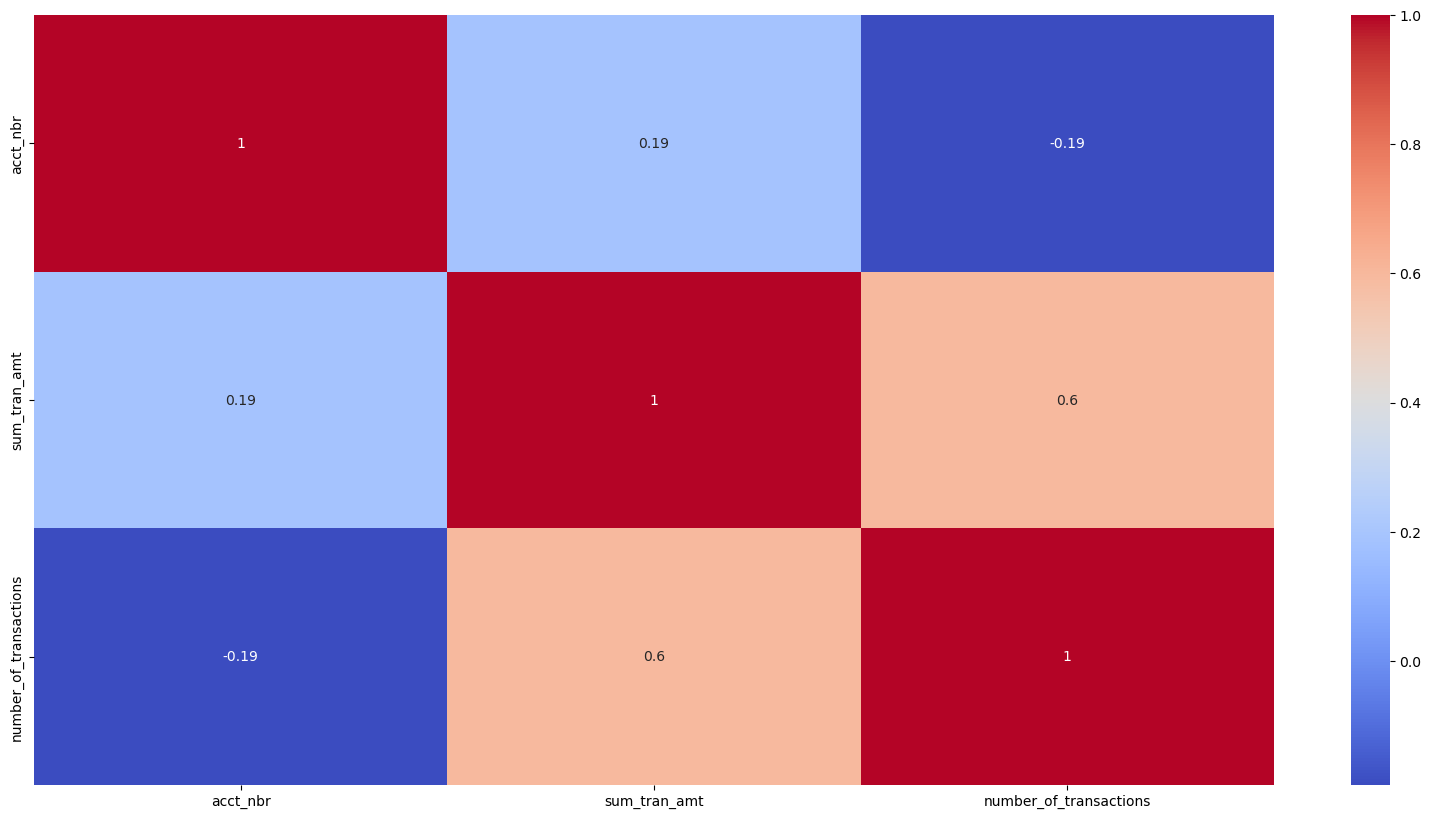

In [96]:
# correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


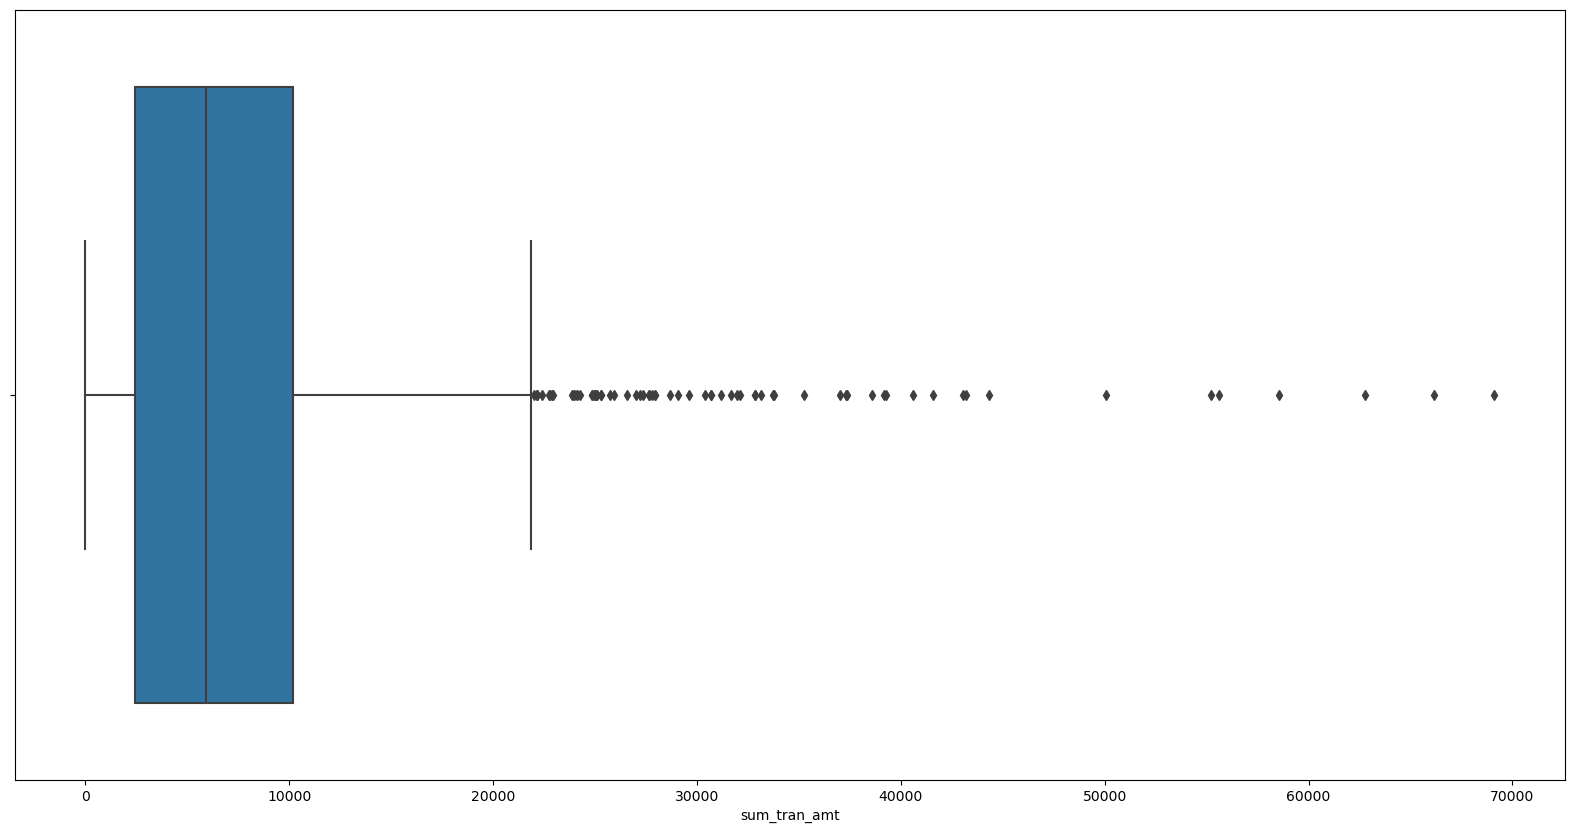

In [98]:
# box plot for sum_tran_amt
plt.figure(figsize=(20,10))
sns.boxplot(x='sum_tran_amt', data=df)
plt.show()


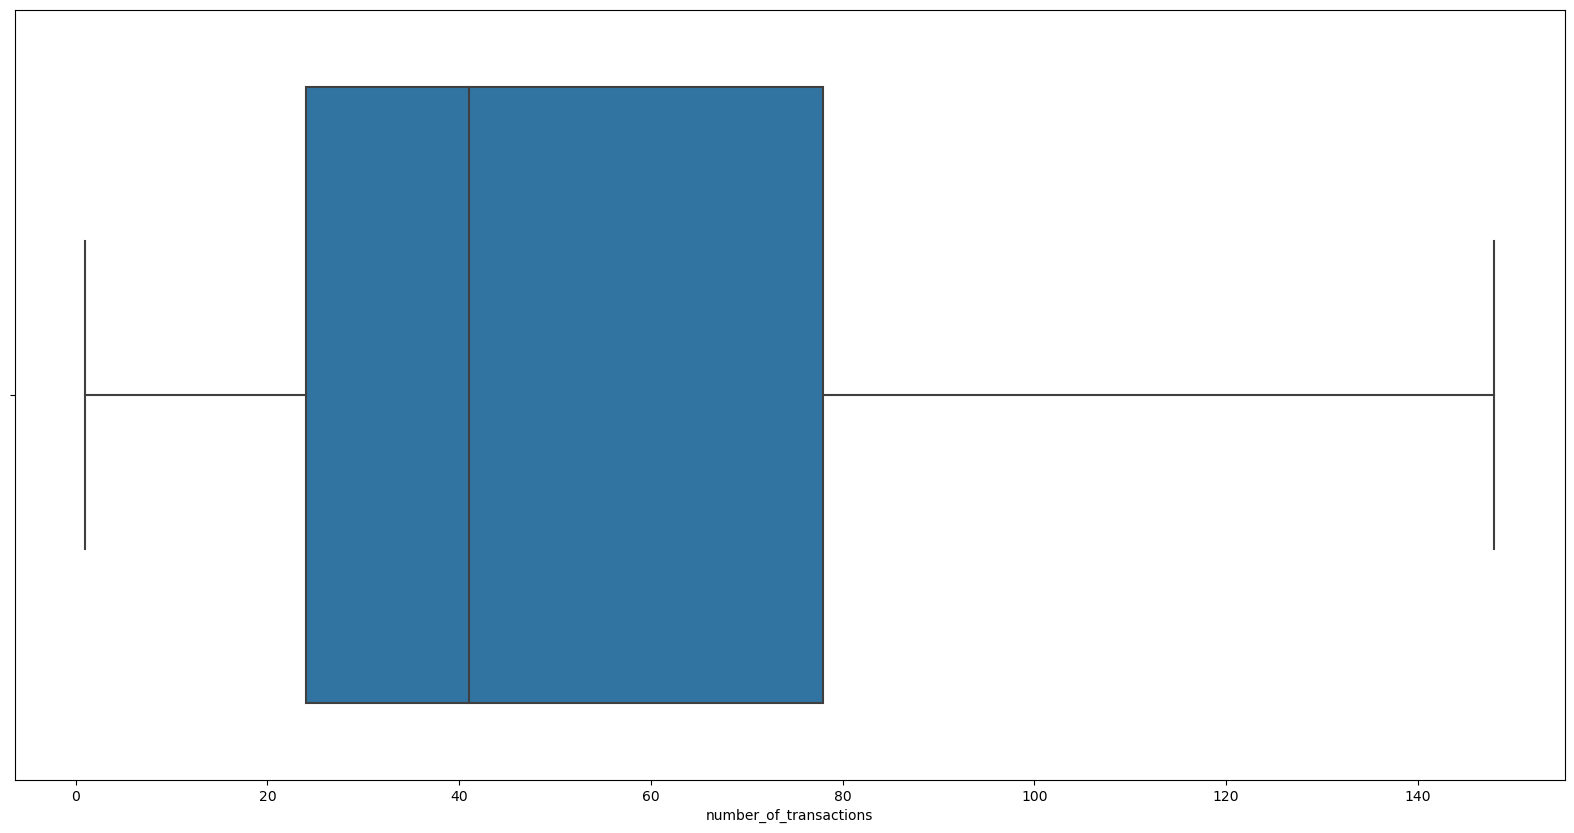

In [99]:
# box plot for number_of_transactions
plt.figure(figsize=(20,10))
sns.boxplot(x='number_of_transactions', data=df)
plt.show()


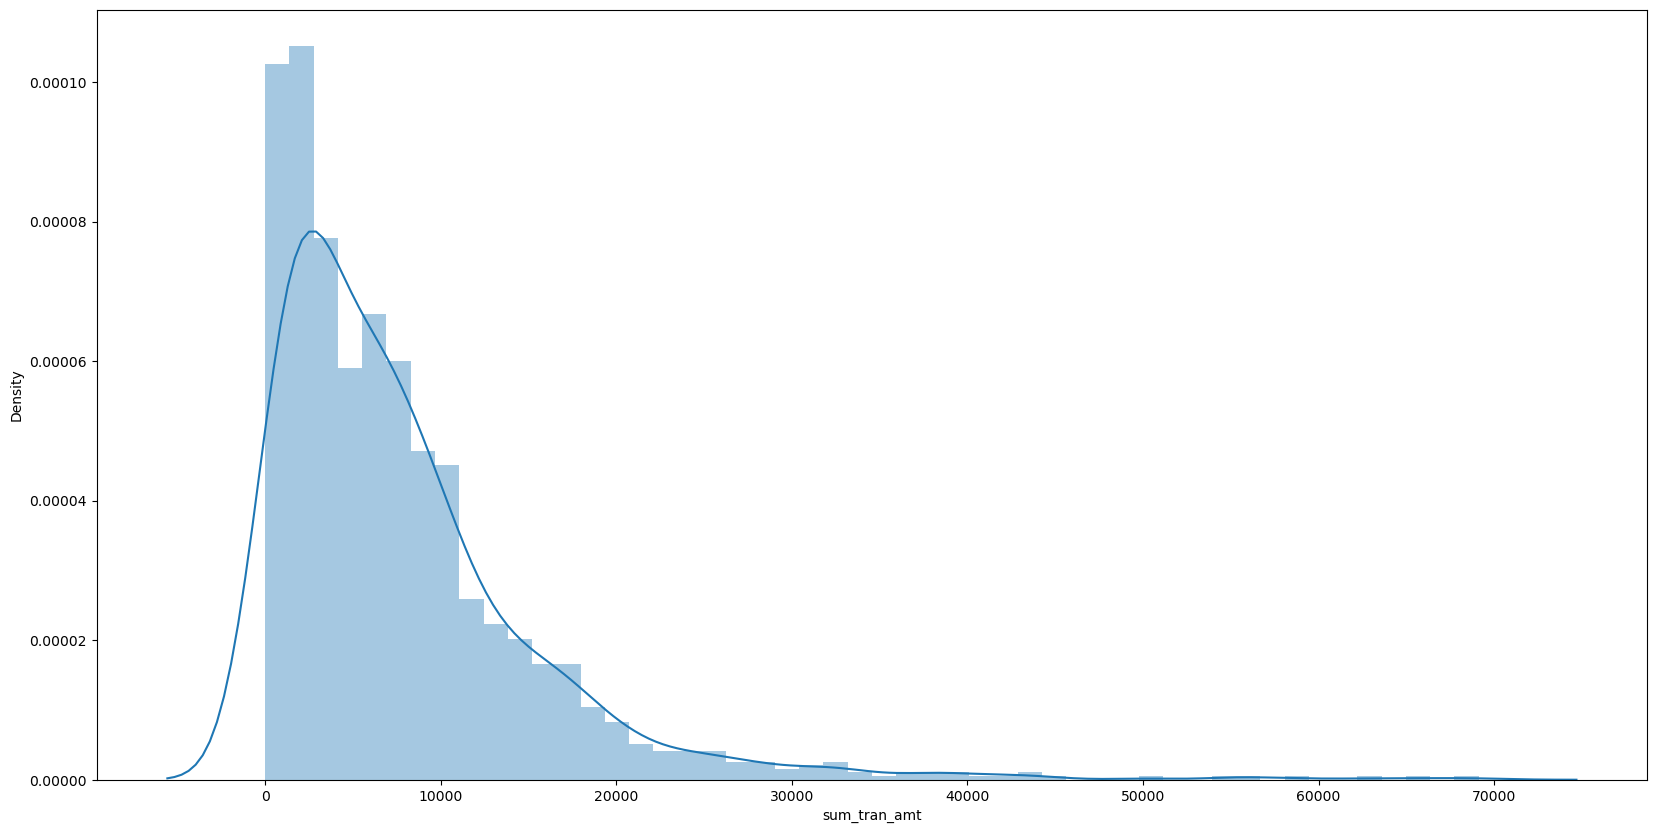

In [100]:
# plot histogram for sum_tran_amt
plt.figure(figsize=(20,10))
sns.distplot(df['sum_tran_amt'])
plt.show()


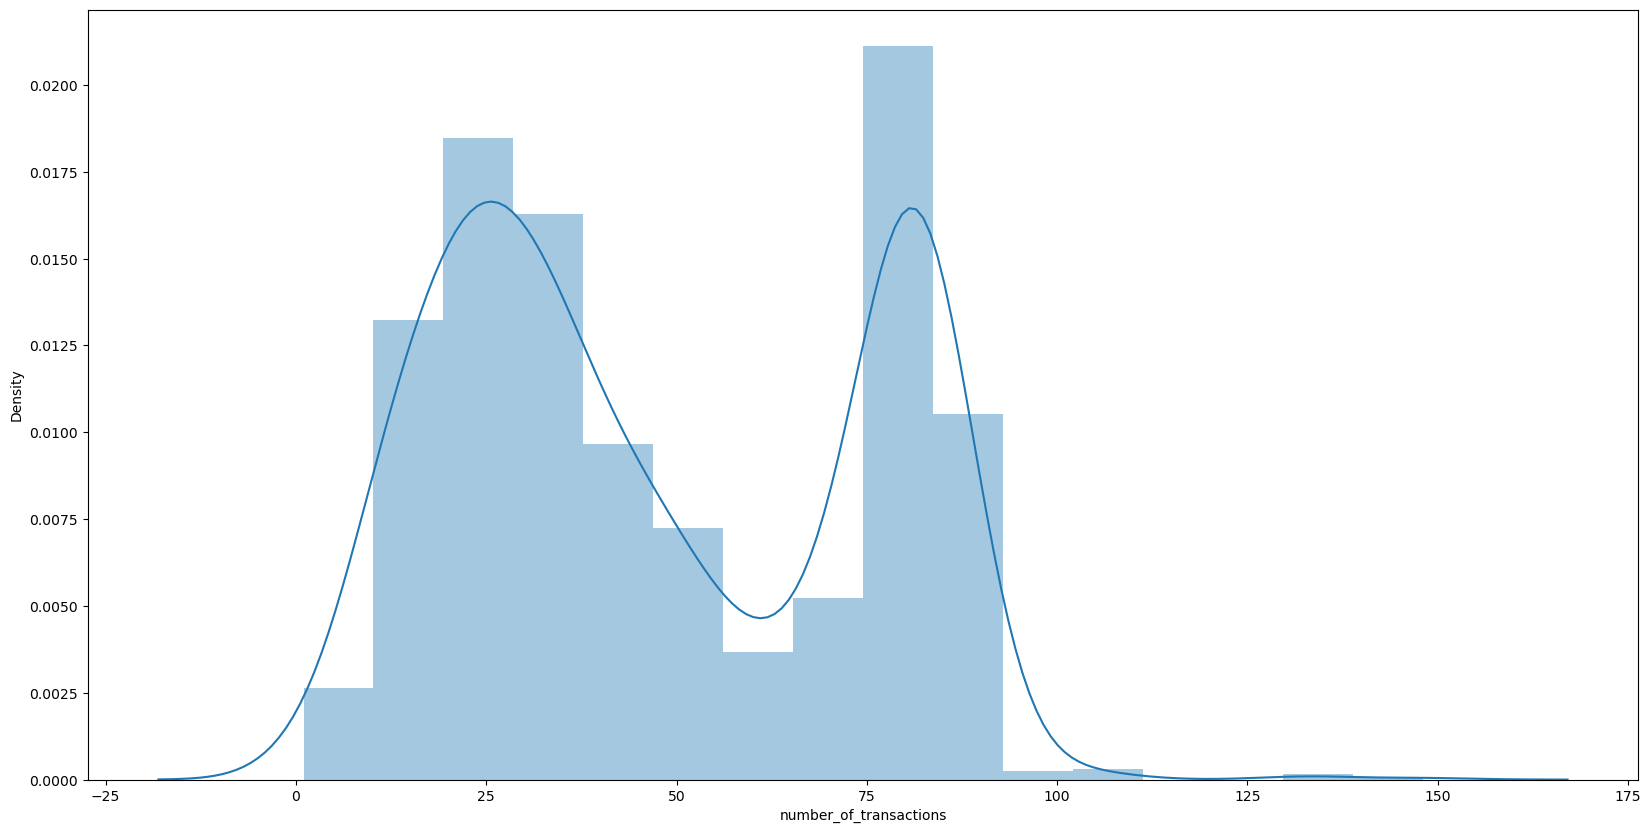

In [101]:
# histogram for number_of_transactions
plt.figure(figsize=(20,10))
sns.distplot(df['number_of_transactions'])
plt.show()


### Scaling 

In [102]:
df.head()

,acct_nbr,sum_tran_amt,number_of_transactions
2,13630842,15921.74,78
3,13631412,5723.31,81
5,13625032,6582.43,80
6,13631642,6674.62,87
7,4561143213634590,3801.53,28


In [ ]:
# TODO:
#1. scale sum_tran_amt and number_of_transactions columns using StandardScaler
#2. use PCA to reduce the number of features to 2
#3. plot the PCA components


In [103]:
#1. scale sum_tran_amt and number_of_transactions columns using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['sum_tran_amt', 'number_of_transactions']] = sc.fit_transform(df[['sum_tran_amt', 'number_of_transactions']])
df.head()

,acct_nbr,sum_tran_amt,number_of_transactions
2,13630842,1.032618,1.119723
3,13631412,-0.258770,1.230734
5,13625032,-0.149983,1.193730
6,13631642,-0.138309,1.452755
7,4561143213634590,-0.502117,-0.730457


In [105]:
# Export to csv
df.to_csv('/Users/patrick/Desktop/Lighthouse_labs/Data Projects/Clustering-/Transactions/transactions_scaled.csv', index=False)